In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import xarray as xr
import glob,os
import cmocean as cm

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

from dask.distributed import Client
from mpl_toolkits.axes_grid1 import make_axes_locatable

import cftime as cft

import gsw as gsw

In [3]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/43933/status,
Dashboard: /proxy/43933/status,Workers: 4
Total threads: 4,Total memory: 100.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:36699,Workers: 4
Dashboard: /proxy/43933/status,Total threads: 4
Started: Just now,Total memory: 100.00 GiB
Comm: tcp://127.0.0.1:36307,Total threads: 1
Dashboard: /proxy/33403/status,Memory: 25.00 GiB
Nanny: tcp://127.0.0.1:46237,


In [3]:
def gcdist(lat1, lat2, lon1, lon2):
    # Radius of the Earth in m
    r = 6371000
    # Difference between points (lon/lat)
    dlon = lon2-lon1
    dlat = lat2-lat1
    # Calculate distance in km
    gcdist = r * np.deg2rad(np.sqrt(dlat**2 + (dlon*np.cos(np.deg2rad(np.mean([lat1,lat2]))))**2))

    return gcdist

In [4]:
# /g/data/v45/pas561/RG_Argo
rgargo_1921=xr.open_mfdataset('/g/data/v45/pas561/RG_Argo/*9.nc',engine='netcdf4',combine='nested',concat_dim='TIME',decode_times=False)
rgargo_1921


,Array,Chunk
Bytes,415.78 MiB,11.55 MiB
Shape,"(36, 58, 145, 360)","(1, 58, 145, 360)"
Count,108 Tasks,36 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,415.78 MiB,11.55 MiB
Shape,"(36, 58, 145, 360)","(1, 58, 145, 360)"
Count,108 Tasks,36 Chunks
Type,float32,numpy.ndarray


In [5]:
#get dxt and dyt for area averaging
print(rgargo_1921.LONGITUDE.shape,rgargo_1921.LATITUDE.shape) 
dxt=np.zeros(rgargo_1921.LONGITUDE.shape) 
dyt=np.zeros(rgargo_1921.LATITUDE.shape) 

for i in range(1,rgargo_1921.LATITUDE.shape[0]):
    dyt[i]=gcdist(rgargo_1921.LATITUDE[i-1],rgargo_1921.LATITUDE[i],rgargo_1921.LONGITUDE[i],rgargo_1921.LONGITUDE[i])
dyt[0]=dyt[1]
dyt

(360,) (145,)


array([111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
      

In [7]:
rg_dyt = xr.DataArray(
    data=dyt,
    dims=["LATITUDE"],
    coords=dict(
        lat=(["LATITUDE"], rgargo_1921.LATITUDE.data),
    ),
    attrs=dict(
        description="RGARGO grid dyt",
        units="m",
    ),
)
rg_dyt

<xarray.DataArray (LATITUDE: 145)>
array([111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832])
Coordinates:
    lat      (LATITUDE) float32 -64.5 -63.5 -62.5 -61.5 ... 76.5 77.5 78.5 79.5
Dimensions without coordinates: LATITUDE
Attributes:
    description:  RGARGO grid dyt
    units:        m

In [8]:
rgargo_1921.ARGO_TEMPERATURE_ANOMALY.TIME

<xarray.DataArray 'TIME' (TIME: 36)>
array([180.5, 181.5, 182.5, 183.5, 184.5, 185.5, 186.5, 187.5, 188.5, 189.5,
       190.5, 191.5, 192.5, 193.5, 194.5, 195.5, 196.5, 197.5, 198.5, 199.5,
       200.5, 201.5, 202.5, 203.5, 204.5, 205.5, 206.5, 207.5, 208.5, 209.5,
       210.5, 211.5, 212.5, 213.5, 214.5, 215.5])
Coordinates:
  * TIME     (TIME) float64 180.5 181.5 182.5 183.5 ... 212.5 213.5 214.5 215.5
Attributes:
    units:        months since 2004-01-01 00:00:00
    time_origin:  01-JAN-2004 00:00:00
    axis:         T

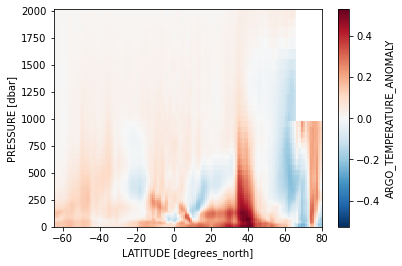

In [9]:
rgargo_1921.ARGO_TEMPERATURE_ANOMALY.mean(dim='LONGITUDE').mean(dim='TIME').plot()

In [10]:
rgargo_0418=xr.open_dataset('/g/data/v45/pas561/RG_Argo/RG_ArgoClim_Temperature_2014_2018.nc',engine='netcdf4',decode_times=False)

In [11]:
rgargo_0418

<xarray.Dataset>
Dimensions:                   (LONGITUDE: 360, LATITUDE: 145, PRESSURE: 58, TIME: 180)
Coordinates:
  * LONGITUDE                 (LONGITUDE) float32 20.5 21.5 22.5 ... 378.5 379.5
  * LATITUDE                  (LATITUDE) float32 -64.5 -63.5 -62.5 ... 78.5 79.5
  * PRESSURE                  (PRESSURE) float32 2.5 10.0 ... 1.9e+03 1.975e+03
  * TIME                      (TIME) float32 0.5 1.5 2.5 ... 177.5 178.5 179.5
Data variables:
    ARGO_TEMPERATURE_MEAN     (PRESSURE, LATITUDE, LONGITUDE) float32 ...
    ARGO_TEMPERATURE_ANOMALY  (TIME, PRESSURE, LATITUDE, LONGITUDE) float32 ...
    BATHYMETRY_MASK           (PRESSURE, LATITUDE, LONGITUDE) float32 ...
    MAPPING_MASK              (PRESSURE, LATITUDE, LONGITUDE) float32 ...

In [12]:
rgargo_0418.ARGO_TEMPERATURE_ANOMALY.TIME

<xarray.DataArray 'TIME' (TIME: 180)>
array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,   9.5,
        10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,  18.5,  19.5,
        20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,  27.5,  28.5,  29.5,
        30.5,  31.5,  32.5,  33.5,  34.5,  35.5,  36.5,  37.5,  38.5,  39.5,
        40.5,  41.5,  42.5,  43.5,  44.5,  45.5,  46.5,  47.5,  48.5,  49.5,
        50.5,  51.5,  52.5,  53.5,  54.5,  55.5,  56.5,  57.5,  58.5,  59.5,
        60.5,  61.5,  62.5,  63.5,  64.5,  65.5,  66.5,  67.5,  68.5,  69.5,
        70.5,  71.5,  72.5,  73.5,  74.5,  75.5,  76.5,  77.5,  78.5,  79.5,
        80.5,  81.5,  82.5,  83.5,  84.5,  85.5,  86.5,  87.5,  88.5,  89.5,
        90.5,  91.5,  92.5,  93.5,  94.5,  95.5,  96.5,  97.5,  98.5,  99.5,
       100.5, 101.5, 102.5, 103.5, 104.5, 105.5, 106.5, 107.5, 108.5, 109.5,
       110.5, 111.5, 112.5, 113.5, 114.5, 115.5, 116.5, 117.5, 118.5, 119.5,
       120.5, 121.5, 122.5, 123.5, 124.5, 125.5, 126.5, 127.5, 128.5, 129.5,
       130.5, 131.5, 132.5, 133.5, 134.5, 135.5, 136.5, 137.5, 138.5, 139.5,
       140.5, 141.5, 142.5, 143.5, 144.5, 145.5, 146.5, 147.5, 148.5, 149.5,
       150.5, 151.5, 152.5, 153.5, 154.5, 155.5, 156.5, 157.5, 158.5, 159.5,
       160.5, 161.5, 162.5, 163.5, 164.5, 165.5, 166.5, 167.5, 168.5, 169.5,
       170.5, 171.5, 172.5, 173.5, 174.5, 175.5, 176.5, 177.5, 178.5, 179.5],
      dtype=float32)
Coordinates:
  * TIME     (TIME) float32 0.5 1.5 2.5 3.5 4.5 ... 176.5 177.5 178.5 179.5
Attributes:
    units:        months since 2004-01-01 00:00:00
    time_origin:  01-JAN-2004 00:00:00
    axis:         T

In [ ]:
rgargo_temp_anom_0421=xr.concat((rgargo_0418.ARGO_TEMPERATURE_ANOMALY,rgargo_1921.ARGO_TEMPERATURE_ANOMALY),dim='TIME')

In [ ]:
#calculate full monthy data (add anomaly to mean data)
rgargo_temp_0421=(rgargo_temp_anom_0421+rgargo_0418.ARGO_TEMPERATURE_MEAN).compute()

In [ ]:
rgargo_temp_0421.shape #18 years of monthly data

In [ ]:
#calc Longterm Monthly Mean

#create xarray of 12 months of data
rgargo_temp_0421_ltmm=rgargo_temp_0421[0:12,:,:,:].copy(deep=True)
print(rgargo_temp_0421_ltmm.shape)

for ii in range(0,12): 
    print(rgargo_temp_0421[ii:216:12,:,:,:].shape)
    tmp=rgargo_temp_0421[ii:216:12,:,:,:].copy(deep=True)
    #print(tmp.TIME)
    rgargo_temp_0421_ltmm[ii,:,:,:]=tmp.mean(dim='TIME').compute()

rgargo_temp_0421_ltmm.to_netcdf('rgargo_temp_0421_ltmm.nc')

In [ ]:
#calc Anomalies relative to Longterm Monthly Mean

#make copy of the xarray to store anoms
rgargo_temp_0421_anom_ltmm=rgargo_temp_0421.copy(deep=True)
#print(rgargo_temp_0421_anom_ltmm)

mnth= 0

for ii in range(0,216): #96
    
    if np.mod(ii,12)==0:
        mnth=0
    #print(mnth,ii)
    
    #calc anom relative to LTMM
    rgargo_temp_0421_anom_ltmm[ii,:,:,:]=rgargo_temp_0421[ii,:,:,:]-rgargo_temp_0421_ltmm[mnth,:,:,:]
    
    mnth=mnth+1

rgargo_temp_0421_anom_ltmm.to_netcdf('rgargo_temp_0421_anom_ltmm.nc')

In [ ]:
#calc std of zavg temp ltmm anoms
temp_zavg_std=rgargo_temp_0421_anom_ltmm.mean(dim='LONGITUDE').std(axis=0,keep_attrs=True)
temp_zavg_std.shape

In [ ]:
#divide anomalies by std
temp_zavg_anom_div_std=rgargo_temp_0421_anom_ltmm.mean(dim='LONGITUDE')/rgargo_temp_0421_anom_ltmm.mean(dim='LONGITUDE').std(axis=0,keep_attrs=True)
temp_zavg_anom_div_std.shape

In [19]:
#make a movie of zonal average temp anoms/std

fig = plt.figure(figsize=(12, 12), dpi=150)
plt.subplot(1, 1, 1)
plt.gca().patch.set_color('.25')

clev = np.arange(-0.2,0.205,.005)
tick_lvls = np.arange(-0.2,.3, .1)

#clev2 = np.arange(-3,3.1,.1)
#tick_lvls2 = np.arange(-3,3.1,.1)

yr=2013
mnth= 0 #['Jan,Feb,Mar]
mnth_txt=['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sept','Oct','Nov','Dec']


for ii in range(0,96): #96
    
    if np.mod(ii,12)==0:
        yr=yr+1
        mnth=0
    print(mnth,ii) #var2a.TIME)
    
    #monthly mean anom zavg
    var1=    rgargo_temp_0421_anom_ltmm.mean(dim='LONGITUDE')[120+ii]
    p1=plt.contourf(var1.LATITUDE,var1.PRESSURE,var1,cmap=cm.cm.balance,levels=clev,extend='both') #
    
    #monthly mean anom zavg/std
    var1=temp_zavg_anom_div_std[120+ii]
    p2=plt.contourf(var1.LATITUDE,var1.PRESSURE,var1.where((var1>2) | (var1<-2)),colors='none',hatches='.') #
    
    plt.gca().invert_yaxis()
    plt.ylabel('Pressure (dbar)')
    plt.xlabel('Latitude ($^\circ$S)')
    #plt.ylim((5500,1000))
    plt.xlim([-64.5,-30])
    #plt.xticks([-65,-55])       
    tit='RG ARGO Temp Anomaly (-LTMM)/STD '+ str(yr) +' '+mnth_txt[mnth]
    print(tit)
    plt.title(tit)
    
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", "2%", pad="5%")
    cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
    cb.ax.set_xlabel('$^\circ$C')

    plt.tight_layout()
    
    mnth=mnth+1
    
    filestr = '/home/561/pas561/gdv45/jnb/SeaIce2021/movies/zavg_ltmm_temp_anom_div_std_image%04d.png' % ii
    plt.savefig(filestr,dpi=150,bbox_inches='tight')
    plt.clf()

0 0
RG ARGO Temp Anomaly (-LTMM)/STD 2014 Jan
1 1
RG ARGO Temp Anomaly (-LTMM)/STD 2014 Feb
2 2
RG ARGO Temp Anomaly (-LTMM)/STD 2014 Mar
3 3
RG ARGO Temp Anomaly (-LTMM)/STD 2014 Apr
4 4
RG ARGO Temp Anomaly (-LTMM)/STD 2014 May
5 5
RG ARGO Temp Anomaly (-LTMM)/STD 2014 Jun
6 6
RG ARGO Temp Anomaly (-LTMM)/STD 2014 July
7 7
RG ARGO Temp Anomaly (-LTMM)/STD 2014 Aug
8 8
RG ARGO Temp Anomaly (-LTMM)/STD 2014 Sept
9 9
RG ARGO Temp Anomaly (-LTMM)/STD 2014 Oct
10 10
RG ARGO Temp Anomaly (-LTMM)/STD 2014 Nov
11 11
RG ARGO Temp Anomaly (-LTMM)/STD 2014 Dec
0 12
RG ARGO Temp Anomaly (-LTMM)/STD 2015 Jan
1 13
RG ARGO Temp Anomaly (-LTMM)/STD 2015 Feb
2 14
RG ARGO Temp Anomaly (-LTMM)/STD 2015 Mar
3 15
RG ARGO Temp Anomaly (-LTMM)/STD 2015 Apr
4 16
RG ARGO Temp Anomaly (-LTMM)/STD 2015 May
5 17
RG ARGO Temp Anomaly (-LTMM)/STD 2015 Jun
6 18
RG ARGO Temp Anomaly (-LTMM)/STD 2015 July
7 19
RG ARGO Temp Anomaly (-LTMM)/STD 2015 Aug
8 20
RG ARGO Temp Anomaly (-LTMM)/STD 2015 Sept
9 21
RG ARGO Temp

<Figure size 1800x1800 with 0 Axes>

In [21]:
from PIL import Image
import glob
!ffmpeg -framerate 5 -pattern_type glob -i '/home/561/pas561/gdv45/jnb/SeaIce2021/movies/zavg_ltmm_temp_anom_div_std_image*.png' -s 1800x1800 -c:v libx264 -pix_fmt yuv420p /home/561/pas561/gdv45/jnb/SeaIce2021/movies/zavg_ltmm_temp_anom_hatched_1421.mp4

ffmpeg version 4.4.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 9.4.0 (GCC)
  configuration: --prefix=/home/conda/feedstock_root/build_artifacts/ffmpeg_1636205340875/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1636205340875/_build_env/bin/x86_64-conda-linux-gnu-cc --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-gnutls --enable-gpl --enable-hardcoded-tables --enable-libfreetype --enable-libopenh264 --enable-vaapi --enable-libx264 --enable-libx265 --enable-libaom --enable-libsvtav1 --enable-libxml2 --enable-libvpx --enable-pic --enable-pthreads --enable-shared --disable-static --enable-version3 --enable-zlib --enable-libmp3lame --pkg-config=/home/conda/feedstock_root/build_artifacts/ffmpeg_1636205340875/_build_env/bin/pkg-config
  lib

In [22]:
rgargo_temp_0421_anom_ltmm.shape

(216, 58, 145, 360)

In [27]:
dzt=xr.concat((rgargo_temp_0421_anom_ltmm.PRESSURE[0].diff('PRESSURE'),rgargo_temp_0421_anom_ltmm.PRESSURE.diff('PRESSURE')),dim='PRESSURE')
dzt.sel(PRESSURE=slice(0,100)).sum()

<xarray.DataArray 'PRESSURE' ()>
array(100., dtype=float32)

In [50]:
#upper 100m divide anomalies by std

#not depth weighted averaged
#temp_100m_anom_div_std=rgargo_temp_0421_anom_ltmm[:,0:11,:,:].mean(dim='PRESSURE')/rgargo_temp_0421_anom_ltmm[:,0:11,:,:].mean(dim='PRESSURE').std(axis=0,keep_attrs=True)
#temp_100m_anom_div_std.shape

#depth weighted average
rgargo_temp_0421_anom_ltmm_100m=(rgargo_temp_0421_anom_ltmm*dzt).sel(PRESSURE=slice(0,100)).sum('PRESSURE') / dzt.sel(PRESSURE=slice(0,100)).sum()
rgargo_temp_0421_anom_ltmm_100m=rgargo_temp_0421_anom_ltmm_100m.where(rgargo_temp_0421_anom_ltmm_100m!=0,np.NaN)
rgargo_temp_0421_anom_ltmm_100m

<xarray.DataArray (TIME: 216, LATITUDE: 145, LONGITUDE: 360)>
array([[[-0.04347221, -0.07618746, -0.08360276, ...,  0.2703625 ,
          0.15486674,  0.03451943],
        [-0.06437776, -0.08037218, -0.08634863, ...,  0.1181834 ,
          0.0480583 , -0.02327775],
        [-0.09903748, -0.10195418, -0.10620274, ..., -0.07221387,
         -0.08511253, -0.09517636],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[-0.08030143, -0.08007225, -0.07876942, ..., -0.078025  ,
         -0.07649581, -0.0788611 ],
        [-0.10066801, -0.09741665, -0.09376528, ..., -0.09063052,
         -0.09579998, -0.10040139],
        [-0.11294584, -0.10938472, -0.10448056, ..., -0.10336665,
         -0.10964166, -0.11321806],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[-0.05230136, -0.05464032, -0.05532221, ..., -0.03780558,
         -0.04266805, -0.04797224],
        [-0.09138203, -0.09966666, -0.09700697, ..., -0.03291246,
         -0.05183744, -0.07288756],
        [-0.11451109, -0.12900136, -0.1267167 , ..., -0.03724584,
         -0.06011808, -0.08797502],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]], dtype=float32)
Coordinates:
  * LONGITUDE  (LONGITUDE) float32 20.5 21.5 22.5 23.5 ... 377.5 378.5 379.5
  * LATITUDE   (LATITUDE) float32 -64.5 -63.5 -62.5 -61.5 ... 77.5 78.5 79.5
  * TIME       (TIME) float64 0.5 1.5 2.5 3.5 4.5 ... 212.5 213.5 214.5 215.5

In [51]:
#anom/std
temp_100m_anom_div_std=rgargo_temp_0421_anom_ltmm_100m/rgargo_temp_0421_anom_ltmm_100m.std(axis=0,keep_attrs=True)
temp_100m_anom_div_std                                                

<xarray.DataArray (TIME: 216, LATITUDE: 145, LONGITUDE: 360)>
array([[[-0.4317334 , -0.7790802 , -0.87514544, ...,  2.6504893 ,
          1.5273099 ,  0.33892295],
        [-0.61152184, -0.777619  , -0.84544814, ...,  1.1331396 ,
          0.45538595, -0.21850275],
        [-0.89489484, -0.9226872 , -0.96077114, ..., -0.6512812 ,
         -0.7676703 , -0.8587149 ],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[-0.79749364, -0.81880546, -0.8245505 , ..., -0.7649154 ,
         -0.75440866, -0.77428377],
        [-0.95624155, -0.942528  , -0.9180653 , ..., -0.8689633 ,
         -0.9077717 , -0.94244415],
        [-1.0205697 , -0.98993367, -0.9451914 , ..., -0.9322414 ,
         -0.9889101 , -1.0214934 ],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[-0.51941794, -0.5587427 , -0.5791075 , ..., -0.37062567,
         -0.42079622, -0.47100693],
        [-0.8680344 , -0.96429735, -0.94980496, ..., -0.3155639 ,
         -0.49119598, -0.6841783 ],
        [-1.0347131 , -1.1674647 , -1.1463523 , ..., -0.33591214,
         -0.54223347, -0.7937418 ],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]], dtype=float32)
Coordinates:
  * LONGITUDE  (LONGITUDE) float32 20.5 21.5 22.5 23.5 ... 377.5 378.5 379.5
  * LATITUDE   (LATITUDE) float32 -64.5 -63.5 -62.5 -61.5 ... 77.5 78.5 79.5
  * TIME       (TIME) float64 0.5 1.5 2.5 3.5 4.5 ... 212.5 213.5 214.5 215.5

In [54]:
#make a movie of upper 100m temp anoms relative to LTMM
fig = plt.figure(figsize=(10, 8), dpi=220)
plt.subplot(1, 1, 1)
plt.gca().patch.set_color('.25')

clev = np.arange(-1.,1.01,.01)
tick_lvls = np.arange(-1,1.1,.1)

yr=2013
mnth= 0 #['Jan,Feb,Mar]
mnth_txt=['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sept','Oct','Nov','Dec']


for ii in range(0,96): #96
    
    if np.mod(ii,12)==0:
        yr=yr+1
        mnth=0
    print(mnth,ii) #var2a.TIME)
     
    var1= rgargo_temp_0421_anom_ltmm_100m[120+ii,:,:]
    p1=plt.contourf(var1.LONGITUDE,var1.LATITUDE,var1,cmap=cm.cm.balance,levels=clev,extend='both') #
    
    #monthly mean anom zavg/std
    var1=temp_100m_anom_div_std[120+ii,:,:]
    p2=plt.contourf(var1.LONGITUDE,var1.LATITUDE,var1.where((var1>2) | (var1<-2)),colors='none',hatches='.') #

    plt.gca().patch.set_color('.25')
    plt.xlabel('Longitude ($^\circ$)')
    plt.ylim([-64.5,-30])
    
    tit='RG ARGO Temp (0-100m) Anomaly (-LTMM) '+ str(yr) +' '+mnth_txt[mnth]
    print(tit)
    plt.title(tit)
    
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", "2%", pad="5%")
    cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
    cb.ax.set_xlabel('$^\circ$C')

    plt.tight_layout()
    
    mnth=mnth+1
    
    filestr = '/home/561/pas561/gdv45/jnb/SeaIce2021/movies/up100m_ltmm_temp_image%04d.png' % ii
    plt.savefig(filestr,dpi=150,bbox_inches='tight')
    plt.clf()

0 0
RG ARGO Temp (0-100m) Anomaly (-LTMM) 2014 Jan
1 1
RG ARGO Temp (0-100m) Anomaly (-LTMM) 2014 Feb
2 2
RG ARGO Temp (0-100m) Anomaly (-LTMM) 2014 Mar
3 3
RG ARGO Temp (0-100m) Anomaly (-LTMM) 2014 Apr
4 4
RG ARGO Temp (0-100m) Anomaly (-LTMM) 2014 May
5 5
RG ARGO Temp (0-100m) Anomaly (-LTMM) 2014 Jun
6 6
RG ARGO Temp (0-100m) Anomaly (-LTMM) 2014 July
7 7
RG ARGO Temp (0-100m) Anomaly (-LTMM) 2014 Aug
8 8
RG ARGO Temp (0-100m) Anomaly (-LTMM) 2014 Sept
9 9
RG ARGO Temp (0-100m) Anomaly (-LTMM) 2014 Oct
10 10
RG ARGO Temp (0-100m) Anomaly (-LTMM) 2014 Nov
11 11
RG ARGO Temp (0-100m) Anomaly (-LTMM) 2014 Dec
0 12
RG ARGO Temp (0-100m) Anomaly (-LTMM) 2015 Jan
1 13
RG ARGO Temp (0-100m) Anomaly (-LTMM) 2015 Feb
2 14
RG ARGO Temp (0-100m) Anomaly (-LTMM) 2015 Mar
3 15
RG ARGO Temp (0-100m) Anomaly (-LTMM) 2015 Apr
4 16
RG ARGO Temp (0-100m) Anomaly (-LTMM) 2015 May
5 17
RG ARGO Temp (0-100m) Anomaly (-LTMM) 2015 Jun
6 18
RG ARGO Temp (0-100m) Anomaly (-LTMM) 2015 July
7 19
RG ARGO Temp

<Figure size 2200x1760 with 0 Axes>

In [55]:
from PIL import Image
import glob
!ffmpeg -framerate 5 -pattern_type glob -i '/home/561/pas561/gdv45/jnb/SeaIce2021/movies/up100m_ltmm_temp_image*.png' -s 1800x1800 -c:v libx264 -pix_fmt yuv420p /home/561/pas561/gdv45/jnb/SeaIce2021/movies/up100m_ltmm_temp_anom_hatched_v2_1421.mp4

ffmpeg version 4.4.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 9.4.0 (GCC)
  configuration: --prefix=/home/conda/feedstock_root/build_artifacts/ffmpeg_1636205340875/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1636205340875/_build_env/bin/x86_64-conda-linux-gnu-cc --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-gnutls --enable-gpl --enable-hardcoded-tables --enable-libfreetype --enable-libopenh264 --enable-vaapi --enable-libx264 --enable-libx265 --enable-libaom --enable-libsvtav1 --enable-libxml2 --enable-libvpx --enable-pic --enable-pthreads --enable-shared --disable-static --enable-version3 --enable-zlib --enable-libmp3lame --pkg-config=/home/conda/feedstock_root/build_artifacts/ffmpeg_1636205340875/_build_env/bin/pkg-config
  lib

In [69]:
rg_dyt.sel(LATITUDE=slice(-65,-55))

<xarray.DataArray (LATITUDE: 10)>
array([111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832])
Coordinates:
    lat      (LATITUDE) float32 15.5 16.5 17.5 18.5 19.5 ... 21.5 22.5 23.5 24.5
Dimensions without coordinates: LATITUDE
Attributes:
    description:  RGARGO grid dyt
    units:        m

In [71]:
#average south of 55S for hovmoller
#upper 100m divide anomalies by std

#lat weighted average
rgargo_temp_0421_anom_ltmm_100m_s55S=(rgargo_temp_0421_anom_ltmm_100m*rg_dyt).sel(LATITUDE=slice(-65,-55)).sum('LATITUDE') / rg_dyt.sel(LATITUDE=slice(-65,-55)).sum()
rgargo_temp_0421_anom_ltmm_100m_s55S=rgargo_temp_0421_anom_ltmm_100m_s55S.where(rgargo_temp_0421_anom_ltmm_100m_s55S!=0,np.NaN)
rgargo_temp_0421_anom_ltmm_100m_s55S

<xarray.DataArray (TIME: 216, LONGITUDE: 360)>
array([[-0.22153556, -0.18582194, -0.16735361, ..., -0.17656332,
        -0.23053958, -0.24664625],
       [-0.20272528, -0.17502458, -0.15495181, ..., -0.22590195,
        -0.24557639, -0.23350126],
       [-0.28740459, -0.25154333, -0.21537793, ..., -0.22623265,
        -0.2680868 , -0.29450209],
       ...,
       [-0.11130221, -0.10843625, -0.10607763, ..., -0.10448652,
        -0.10984834, -0.11212056],
       [-0.09412959, -0.09923624, -0.10326152, ..., -0.07921681,
        -0.08473265, -0.08934598],
       [-0.080495  , -0.10071986, -0.11795   , ..., -0.0450229 ,
        -0.05302723, -0.06279015]])
Coordinates:
  * LONGITUDE  (LONGITUDE) float32 20.5 21.5 22.5 23.5 ... 377.5 378.5 379.5
  * TIME       (TIME) float64 0.5 1.5 2.5 3.5 4.5 ... 212.5 213.5 214.5 215.5

In [72]:
#anom/std
rgargo_temp_0421_anom_ltmm_100m_s55S_div_std=rgargo_temp_0421_anom_ltmm_100m_s55S/rgargo_temp_0421_anom_ltmm_100m_s55S.std(axis=0,keep_attrs=True)
rgargo_temp_0421_anom_ltmm_100m_s55S_div_std                                                

<xarray.DataArray (TIME: 216, LONGITUDE: 360)>
array([[-1.62173918, -1.3401891 , -1.19659442, ..., -1.34015081,
        -1.73684504, -1.83494106],
       [-1.48403949, -1.26231613, -1.10792036, ..., -1.71464081,
        -1.85012971, -1.73714797],
       [-2.10392985, -1.81418638, -1.53997293, ..., -1.71715091,
        -2.0197192 , -2.19096771],
       ...,
       [-0.81478186, -0.78206634, -0.75846529, ..., -0.79307352,
        -0.82757823, -0.83412826],
       [-0.68907058, -0.7157138 , -0.73832981, ..., -0.60127142,
        -0.63836102, -0.66469532],
       [-0.5892593 , -0.72641397, -0.84335383, ..., -0.34173281,
        -0.3994979 , -0.46713148]])
Coordinates:
  * LONGITUDE  (LONGITUDE) float32 20.5 21.5 22.5 23.5 ... 377.5 378.5 379.5
  * TIME       (TIME) float64 0.5 1.5 2.5 3.5 4.5 ... 212.5 213.5 214.5 215.5

In [84]:
rgargo_temp_0421_anom_ltmm_100m_s55S[120:,:].data.transpose().shape

(360, 96)

In [96]:
rgargo_temp_0421_anom_ltmm_100m_s55S[120:].TIME

<xarray.DataArray 'TIME' (TIME: 96)>
array([120.5, 121.5, 122.5, 123.5, 124.5, 125.5, 126.5, 127.5, 128.5, 129.5,
       130.5, 131.5, 132.5, 133.5, 134.5, 135.5, 136.5, 137.5, 138.5, 139.5,
       140.5, 141.5, 142.5, 143.5, 144.5, 145.5, 146.5, 147.5, 148.5, 149.5,
       150.5, 151.5, 152.5, 153.5, 154.5, 155.5, 156.5, 157.5, 158.5, 159.5,
       160.5, 161.5, 162.5, 163.5, 164.5, 165.5, 166.5, 167.5, 168.5, 169.5,
       170.5, 171.5, 172.5, 173.5, 174.5, 175.5, 176.5, 177.5, 178.5, 179.5,
       180.5, 181.5, 182.5, 183.5, 184.5, 185.5, 186.5, 187.5, 188.5, 189.5,
       190.5, 191.5, 192.5, 193.5, 194.5, 195.5, 196.5, 197.5, 198.5, 199.5,
       200.5, 201.5, 202.5, 203.5, 204.5, 205.5, 206.5, 207.5, 208.5, 209.5,
       210.5, 211.5, 212.5, 213.5, 214.5, 215.5])
Coordinates:
  * TIME     (TIME) float64 120.5 121.5 122.5 123.5 ... 212.5 213.5 214.5 215.5
Attributes:
    units:        months since 2004-01-01 00:00:00
    time_origin:  01-JAN-2004 00:00:00
    axis:         T

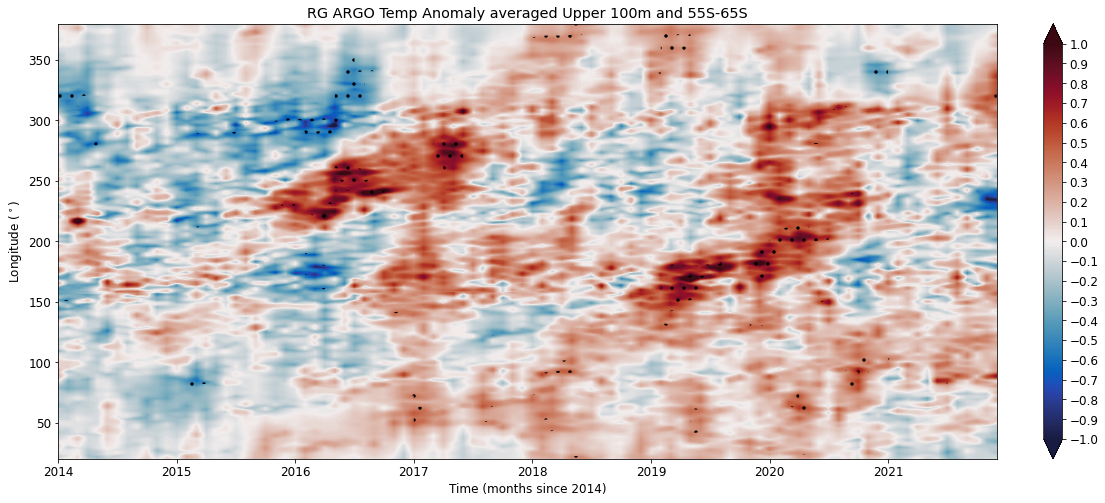

In [102]:
#plot hovmoller
fontsize=12
plt.rcParams['font.size'] = fontsize

plt.figure(figsize=(18,8))

clev = np.arange(-1,1.005,.005)
tick_lvls = np.arange(-1,1.1, .1)

var1= rgargo_temp_0421_anom_ltmm_100m_s55S[120:,:]
p1=plt.contourf(var1.TIME,var1.LONGITUDE,var1.data.transpose(),cmap=cm.cm.balance,levels=clev,extend='both') #
    
#monthly mean anom zavg/std
var1=rgargo_temp_0421_anom_ltmm_100m_s55S_div_std[120:,:]
p2=plt.contourf(var1.TIME,var1.LONGITUDE,var1.where((var1>2) | (var1<-2)).data.transpose(),colors='none',hatches='.') #

plt.gca().patch.set_color('.25')
plt.ylabel('Longitude ($^\circ$)')
plt.xlabel('Time (months since 2014)')
plt.title('RG ARGO Temp Anomaly averaged Upper 100m and 55S-65S')
plt.xticks([120.5,120.5+12,120.5+24,120.5+36,120.5+48,120.5+60,120.5+72,120.5+84])
plt.gca().set_xticklabels(['2014','2015','2016','2017','2018','2019','2020','2021'])


divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
cb.ax.set_xlabel('$^\circ$C')

plt.savefig('rgargo_temp_0421_anom_ltmm_100m_s55S_hov.png',dpi=150,bbox_inches='tight')


In [103]:
#100 to 500m
#depth weighted average
rgargo_temp_0421_anom_ltmm_500m=(rgargo_temp_0421_anom_ltmm*dzt).sel(PRESSURE=slice(100,500)).sum('PRESSURE') / dzt.sel(PRESSURE=slice(100,500)).sum()
rgargo_temp_0421_anom_ltmm_500m=rgargo_temp_0421_anom_ltmm_500m.where(rgargo_temp_0421_anom_ltmm_500m!=0,np.NaN)
rgargo_temp_0421_anom_ltmm_500m

<xarray.DataArray (TIME: 216, LATITUDE: 145, LONGITUDE: 360)>
array([[[ 0.06402677,  0.0600593 ,  0.05921715, ...,  0.13470495,
          0.09873917,  0.07541838],
        [ 0.07858472,  0.07527302,  0.07245559, ...,  0.12151422,
          0.09838481,  0.08468564],
        [ 0.09847863,  0.09430694,  0.08683202, ...,  0.10147054,
          0.0993506 ,  0.09915954],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[ 0.06330014,  0.06150034,  0.06013349, ...,  0.07505728,
          0.06896139,  0.06563616],
        [ 0.06501694,  0.06375815,  0.06315007, ...,  0.07616023,
          0.07103352,  0.06724153],
        [ 0.07257454,  0.07338753,  0.07272422, ...,  0.07577743,
          0.07328188,  0.07227471],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[ 0.04253152,  0.04278523,  0.04688073, ...,  0.04573171,
          0.04573478,  0.04445023],
        [-0.01970496, -0.02751625, -0.01630151, ...,  0.03837737,
          0.02297459,  0.00137702],
        [-0.06118628, -0.07507045, -0.0600843 , ...,  0.02766633,
          0.00507421, -0.02822018],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]], dtype=float32)
Coordinates:
  * LONGITUDE  (LONGITUDE) float32 20.5 21.5 22.5 23.5 ... 377.5 378.5 379.5
  * LATITUDE   (LATITUDE) float32 -64.5 -63.5 -62.5 -61.5 ... 77.5 78.5 79.5
  * TIME       (TIME) float64 0.5 1.5 2.5 3.5 4.5 ... 212.5 213.5 214.5 215.5

In [104]:
#average south of 55S for hovmoller
#lat weighted average
rgargo_temp_0421_anom_ltmm_500m_s55S=(rgargo_temp_0421_anom_ltmm_500m*rg_dyt).sel(LATITUDE=slice(-65,-55)).sum('LATITUDE') / rg_dyt.sel(LATITUDE=slice(-65,-55)).sum()
rgargo_temp_0421_anom_ltmm_500m_s55S=rgargo_temp_0421_anom_ltmm_500m_s55S.where(rgargo_temp_0421_anom_ltmm_500m_s55S!=0,np.NaN)
rgargo_temp_0421_anom_ltmm_500m_s55S

<xarray.DataArray (TIME: 216, LONGITUDE: 360)>
array([[ 0.12935698,  0.11529709,  0.09964861, ...,  0.12261914,
         0.13027794,  0.13477575],
       [ 0.08357443,  0.06666857,  0.05923554, ...,  0.12301789,
         0.12671999,  0.10812459],
       [ 0.06304227,  0.06175607,  0.05885846, ...,  0.05611775,
         0.06093767,  0.06356524],
       ...,
       [-0.01270066, -0.00775786, -0.00518438, ..., -0.02765298,
        -0.02376124, -0.01840616],
       [-0.08409079, -0.08460392, -0.08473689, ..., -0.08311352,
        -0.0834166 , -0.08364164],
       [-0.01105846, -0.02722039, -0.03607842, ...,  0.01484909,
         0.01392734,  0.00573876]])
Coordinates:
  * LONGITUDE  (LONGITUDE) float32 20.5 21.5 22.5 23.5 ... 377.5 378.5 379.5
  * TIME       (TIME) float64 0.5 1.5 2.5 3.5 4.5 ... 212.5 213.5 214.5 215.5

In [105]:
#anom/std
rgargo_temp_0421_anom_ltmm_500m_s55S_div_std=rgargo_temp_0421_anom_ltmm_500m_s55S/rgargo_temp_0421_anom_ltmm_500m_s55S.std(axis=0,keep_attrs=True)
rgargo_temp_0421_anom_ltmm_500m_s55S_div_std                                                

<xarray.DataArray (TIME: 216, LONGITUDE: 360)>
array([[ 1.9019663 ,  1.64506498,  1.37436047, ...,  1.72428779,
         1.8721862 ,  1.99046415],
       [ 1.22881456,  0.95123059,  0.81698056, ...,  1.72989511,
         1.8210559 ,  1.59686086],
       [ 0.92692543,  0.88113881,  0.8117799 , ...,  0.7891358 ,
         0.87571741,  0.93877678],
       ...,
       [-0.18674074, -0.11068958, -0.07150339, ..., -0.3888602 ,
        -0.34146587, -0.27183532],
       [-1.23640676, -1.20713319, -1.16869692, ..., -1.16875419,
        -1.19875553, -1.23527921],
       [-0.16259518, -0.388382  , -0.497596  , ...,  0.20880999,
         0.20014573,  0.08475403]])
Coordinates:
  * LONGITUDE  (LONGITUDE) float32 20.5 21.5 22.5 23.5 ... 377.5 378.5 379.5
  * TIME       (TIME) float64 0.5 1.5 2.5 3.5 4.5 ... 212.5 213.5 214.5 215.5

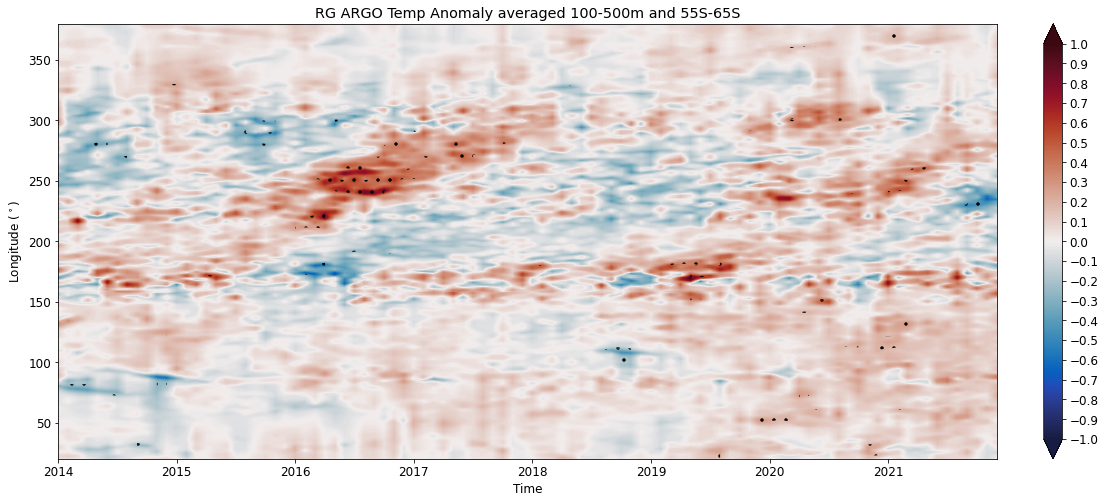

In [106]:
#plot hovmoller
fontsize=12
plt.rcParams['font.size'] = fontsize

plt.figure(figsize=(18,8))

clev = np.arange(-1,1.005,.005)
tick_lvls = np.arange(-1,1.1, .1)

var1= rgargo_temp_0421_anom_ltmm_500m_s55S[120:,:]
p1=plt.contourf(var1.TIME,var1.LONGITUDE,var1.data.transpose(),cmap=cm.cm.balance,levels=clev,extend='both') #
    
#monthly mean anom zavg/std
var1=rgargo_temp_0421_anom_ltmm_500m_s55S_div_std[120:,:]
p2=plt.contourf(var1.TIME,var1.LONGITUDE,var1.where((var1>2) | (var1<-2)).data.transpose(),colors='none',hatches='.') #

plt.gca().patch.set_color('.25')
plt.ylabel('Longitude ($^\circ$)')
plt.xlabel('Time')
plt.title('RG ARGO Temp Anomaly averaged 100-500m and 55S-65S')
plt.xticks([120.5,120.5+12,120.5+24,120.5+36,120.5+48,120.5+60,120.5+72,120.5+84])
plt.gca().set_xticklabels(['2014','2015','2016','2017','2018','2019','2020','2021'])


divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
cb.ax.set_xlabel('$^\circ$C')

plt.savefig('rgargo_temp_0421_anom_ltmm_500m_s55S_hov.png',dpi=150,bbox_inches='tight')


In [108]:
#500 to 2000m
#depth weighted average
rgargo_temp_0421_anom_ltmm_2000m=(rgargo_temp_0421_anom_ltmm*dzt).sel(PRESSURE=slice(500,2000)).sum('PRESSURE') / dzt.sel(PRESSURE=slice(500,2000)).sum()
rgargo_temp_0421_anom_ltmm_2000m=rgargo_temp_0421_anom_ltmm_2000m.where(rgargo_temp_0421_anom_ltmm_2000m!=0,np.NaN)
rgargo_temp_0421_anom_ltmm_2000m

<xarray.DataArray (TIME: 216, LATITUDE: 145, LONGITUDE: 360)>
array([[[ 4.1221301e-03,  2.6483017e-03,  1.1271766e-03, ...,
          1.8003669e-02,  1.0246101e-02,  6.2938547e-03],
        [ 6.0174433e-03,  4.4279173e-03,  3.3016598e-03, ...,
          1.6306702e-02,  1.0868689e-02,  7.9876157e-03],
        [ 8.5133044e-03,  7.1423454e-03,  5.8962391e-03, ...,
          1.0750686e-02,  9.8526292e-03,  9.4003603e-03],
        ...,
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]],

       [[-3.4453722e-03, -3.7814432e-03, -3.7750250e-03, ...,
         -6.3352469e-05, -2.0661161e-03, -2.8718936e-03],
        [-1.7998149e-03, -1.9173359e-03, -1.9793441e-03, ...,
          2.8420717e-04, -9.9633867e-04, -1.5160665e-03],
        [-6.3957623e-04, -1.9284146e-04, -1.1157272e-04, ...,
         -9.6555898e-04, -1.2470102e-03, -1.0215795e-03],
...
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]],

       [[-5.4646484e-03, -4.7112000e-03, -4.2860354e-03, ...,
         -1.3367312e-02, -9.8406784e-03, -6.8705212e-03],
        [-1.1679990e-02, -1.2837919e-02, -1.1459150e-02, ...,
         -6.0243248e-03, -7.3393043e-03, -9.3480414e-03],
        [-1.7181372e-02, -1.8874200e-02, -1.6614316e-02, ...,
         -5.3898036e-03, -8.5160667e-03, -1.2819565e-02],
        ...,
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]]], dtype=float32)
Coordinates:
  * LONGITUDE  (LONGITUDE) float32 20.5 21.5 22.5 23.5 ... 377.5 378.5 379.5
  * LATITUDE   (LATITUDE) float32 -64.5 -63.5 -62.5 -61.5 ... 77.5 78.5 79.5
  * TIME       (TIME) float64 0.5 1.5 2.5 3.5 4.5 ... 212.5 213.5 214.5 215.5

In [109]:
#average south of 55S for hovmoller
#lat weighted average
rgargo_temp_0421_anom_ltmm_2000m_s55S=(rgargo_temp_0421_anom_ltmm_2000m*rg_dyt).sel(LATITUDE=slice(-65,-55)).sum('LATITUDE') / rg_dyt.sel(LATITUDE=slice(-65,-55)).sum()
rgargo_temp_0421_anom_ltmm_2000m_s55S=rgargo_temp_0421_anom_ltmm_2000m_s55S.where(rgargo_temp_0421_anom_ltmm_2000m_s55S!=0,np.NaN)
rgargo_temp_0421_anom_ltmm_2000m_s55S

<xarray.DataArray (TIME: 216, LONGITUDE: 360)>
array([[ 0.02120496,  0.01661749,  0.01137695, ...,  0.01924114,
         0.02182066,  0.02317539],
       [ 0.00198572, -0.00236175, -0.00433765, ...,  0.00875799,
         0.01057943,  0.00733907],
       [ 0.00062351,  0.00059077,  0.00114742, ...,  0.000736  ,
         0.00256405,  0.00221699],
       ...,
       [-0.02121828, -0.01827107, -0.01658614, ..., -0.02834899,
        -0.02640928, -0.02408246],
       [-0.0215135 , -0.02123195, -0.02089082, ..., -0.02026515,
        -0.0208006 , -0.02132502],
       [ 0.00139192, -0.00554545, -0.01190537, ...,  0.00025606,
         0.00399936,  0.00556598]])
Coordinates:
  * LONGITUDE  (LONGITUDE) float32 20.5 21.5 22.5 23.5 ... 377.5 378.5 379.5
  * TIME       (TIME) float64 0.5 1.5 2.5 3.5 4.5 ... 212.5 213.5 214.5 215.5

In [110]:
#anom/std
rgargo_temp_0421_anom_ltmm_2000m_s55S_div_std=rgargo_temp_0421_anom_ltmm_2000m_s55S/rgargo_temp_0421_anom_ltmm_2000m_s55S.std(axis=0,keep_attrs=True)
rgargo_temp_0421_anom_ltmm_2000m_s55S_div_std                                                

<xarray.DataArray (TIME: 216, LONGITUDE: 360)>
array([[ 0.87428786,  0.63947522,  0.40367912, ...,  0.84116292,
         0.95300268,  0.99954944],
       [ 0.08187193, -0.09088512, -0.15390935, ...,  0.3828721 ,
         0.46204948,  0.31653261],
       [ 0.02570748,  0.02273409,  0.04071315, ...,  0.03217562,
         0.11198316,  0.09561826],
       ...,
       [-0.87483703, -0.70310846, -0.58851254, ..., -1.23933006,
        -1.15340715, -1.03867117],
       [-0.88700913, -0.81704926, -0.74125217, ..., -0.88592944,
        -0.90845202, -0.91974359],
       [ 0.05738928, -0.21340039, -0.42242856, ...,  0.01119422,
         0.1746693 ,  0.24005941]])
Coordinates:
  * LONGITUDE  (LONGITUDE) float32 20.5 21.5 22.5 23.5 ... 377.5 378.5 379.5
  * TIME       (TIME) float64 0.5 1.5 2.5 3.5 4.5 ... 212.5 213.5 214.5 215.5

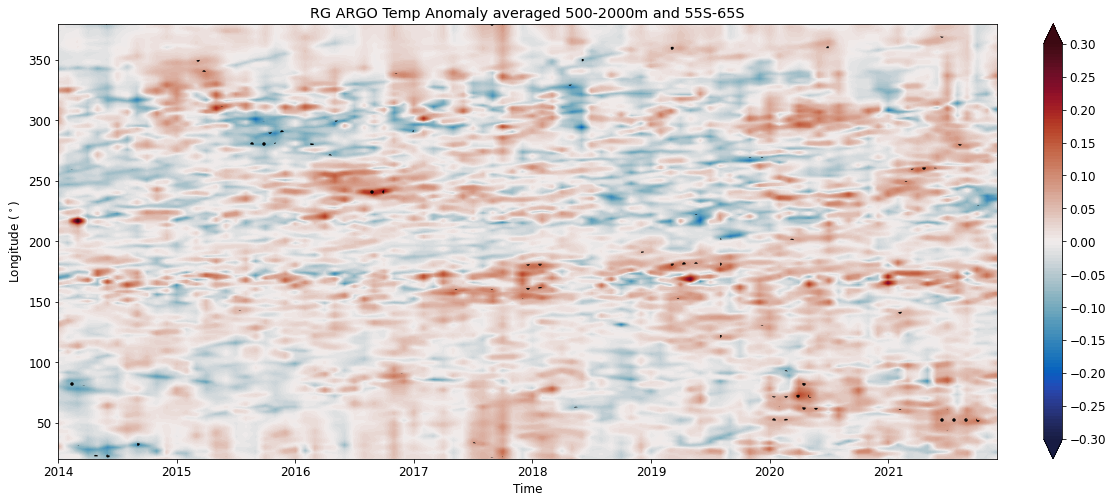

In [113]:
#plot hovmoller
fontsize=12
plt.rcParams['font.size'] = fontsize

plt.figure(figsize=(18,8))

clev = np.arange(-.3,.305,.005)
tick_lvls = np.arange(-.3,.35, .05)

var1= rgargo_temp_0421_anom_ltmm_2000m_s55S[120:,:]
p1=plt.contourf(var1.TIME,var1.LONGITUDE,var1.data.transpose(),cmap=cm.cm.balance,levels=clev,extend='both') #
    
#monthly mean anom zavg/std
var1=rgargo_temp_0421_anom_ltmm_2000m_s55S_div_std[120:,:]
p2=plt.contourf(var1.TIME,var1.LONGITUDE,var1.where((var1>2) | (var1<-2)).data.transpose(),colors='none',hatches='.') #

plt.gca().patch.set_color('.25')
plt.ylabel('Longitude ($^\circ$)')
plt.xlabel('Time')
plt.title('RG ARGO Temp Anomaly averaged 500-2000m and 55S-65S')
plt.xticks([120.5,120.5+12,120.5+24,120.5+36,120.5+48,120.5+60,120.5+72,120.5+84])
plt.gca().set_xticklabels(['2014','2015','2016','2017','2018','2019','2020','2021'])


divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
cb.ax.set_xlabel('$^\circ$C')

plt.savefig('rgargo_temp_0421_anom_ltmm_2000m_s55S_hov.png',dpi=150,bbox_inches='tight')


(58, 145)
(58, 145)
(58, 145)
(58, 145)
(58, 145)
(58, 145)
(58, 145)
(58, 145)


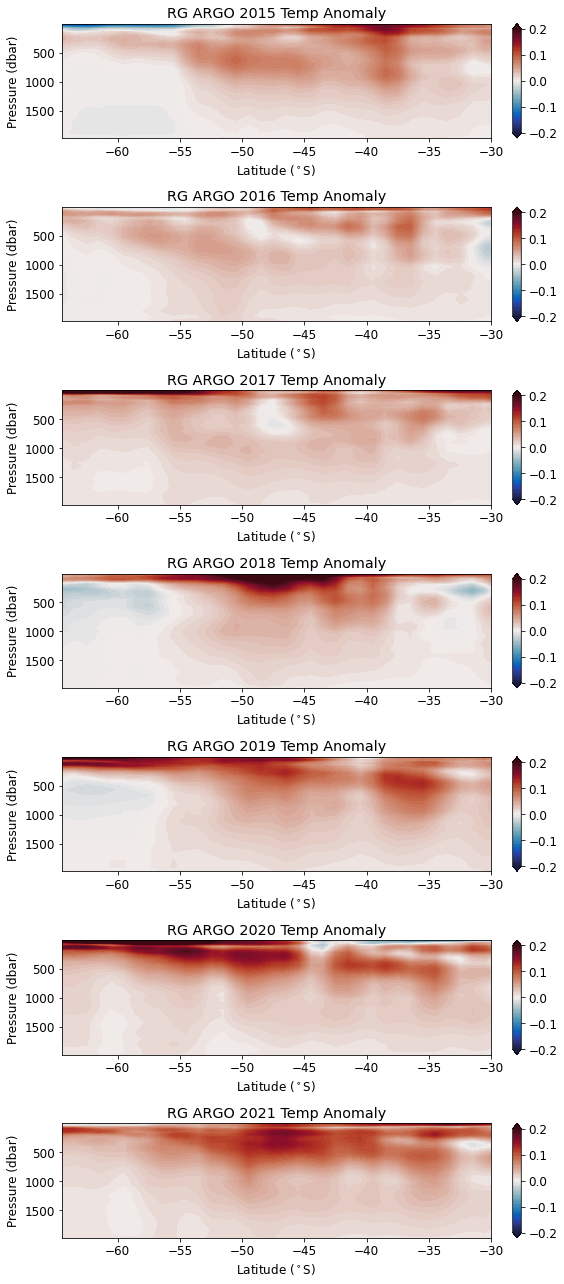

In [102]:
#plot zonal average for 2019/2020/2021
fontsize=12
plt.rcParams['font.size'] = fontsize

plt.figure(figsize=(8,18))

clev = np.arange(-0.2,0.205,.005)
tick_lvls = np.arange(-0.2,.3, .1)

var1= rgargo_0418.ARGO_TEMPERATURE_ANOMALY[132:144,:,:,:].mean(dim='LONGITUDE').mean(dim='TIME').compute()
print(var1.shape)

plt.subplot(7,1,1)
plt.gca().patch.set_color('.25')
p1=plt.contourf(var1.LATITUDE,var1.PRESSURE,var1,cmap=cm.cm.balance,levels=clev,extend='both') #
plt.gca().invert_yaxis()
plt.ylabel('Pressure (dbar)')
plt.xlabel('Latitude ($^\circ$S)')
#plt.ylim((5500,1000))
plt.xlim([-64.5,-30])
#plt.xticks([-65,-55])
plt.title('RG ARGO 2015 Temp Anomaly')

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
cb.ax.set_xlabel('$^\circ$C')

var1= rgargo_0418.ARGO_TEMPERATURE_ANOMALY[144:156,:,:,:].mean(dim='LONGITUDE').mean(dim='TIME').compute()
print(var1.shape)

plt.subplot(7,1,2)
plt.gca().patch.set_color('.25')
p1=plt.contourf(var1.LATITUDE,var1.PRESSURE,var1,cmap=cm.cm.balance,levels=clev,extend='both') #
plt.gca().invert_yaxis()
plt.ylabel('Pressure (dbar)')
plt.xlabel('Latitude ($^\circ$S)')
#plt.ylim((5500,1000))
plt.xlim([-64.5,-30])
#plt.xticks([-65,-55])
plt.title('RG ARGO 2016 Temp Anomaly')

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
cb.ax.set_xlabel('$^\circ$C')

var1= rgargo_0418.ARGO_TEMPERATURE_ANOMALY[156:168,:,:,:].mean(dim='LONGITUDE').mean(dim='TIME').compute()
print(var1.shape)

plt.subplot(7,1,3)
plt.gca().patch.set_color('.25')
p1=plt.contourf(var1.LATITUDE,var1.PRESSURE,var1,cmap=cm.cm.balance,levels=clev,extend='both') #
plt.gca().invert_yaxis()
plt.ylabel('Pressure (dbar)')
plt.xlabel('Latitude ($^\circ$S)')
#plt.ylim((5500,1000))
plt.xlim([-64.5,-30])
#plt.xticks([-65,-55])
plt.title('RG ARGO 2017 Temp Anomaly')

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
cb.ax.set_xlabel('$^\circ$C')

var1= rgargo_0418.ARGO_TEMPERATURE_ANOMALY[168:180,:,:,:].mean(dim='LONGITUDE').mean(dim='TIME').compute()
print(var1.shape)

plt.subplot(7,1,4)
plt.gca().patch.set_color('.25')
p1=plt.contourf(var1.LATITUDE,var1.PRESSURE,var1,cmap=cm.cm.balance,levels=clev,extend='both') #
plt.gca().invert_yaxis()
plt.ylabel('Pressure (dbar)')
plt.xlabel('Latitude ($^\circ$S)')
#plt.ylim((5500,1000))
plt.xlim([-64.5,-30])
#plt.xticks([-65,-55])
plt.title('RG ARGO 2018 Temp Anomaly')

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
cb.ax.set_xlabel('$^\circ$C')


var1= rgargo_1921.ARGO_TEMPERATURE_ANOMALY[0:12,:,:,:].mean(dim='LONGITUDE').mean(dim='TIME').compute()
print(var1.shape)

plt.subplot(7,1,5)
plt.gca().patch.set_color('.25')
p1=plt.contourf(var1.LATITUDE,var1.PRESSURE,var1,cmap=cm.cm.balance,levels=clev,extend='both') #
plt.gca().invert_yaxis()
plt.ylabel('Pressure (dbar)')
plt.xlabel('Latitude ($^\circ$S)')
#plt.ylim((5500,1000))
plt.xlim([-64.5,-30])
#plt.xticks([-65,-55])
plt.title('RG ARGO 2019 Temp Anomaly')

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
cb.ax.set_xlabel('$^\circ$C')


var1= rgargo_1921.ARGO_TEMPERATURE_ANOMALY[12:24,:,:,:].mean(dim='LONGITUDE').mean(dim='TIME').compute()
print(var1.shape)

plt.subplot(7,1,6)
plt.gca().patch.set_color('.25')
p1=plt.contourf(var1.LATITUDE,var1.PRESSURE,var1,cmap=cm.cm.balance,levels=clev,extend='both') #
plt.gca().invert_yaxis()
plt.ylabel('Pressure (dbar)')
plt.xlabel('Latitude ($^\circ$S)')
#plt.ylim((5500,1000))
plt.xlim([-64.5,-30])
#plt.xticks([-65,-55])
plt.title('RG ARGO 2020 Temp Anomaly')

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
cb.ax.set_xlabel('$^\circ$C')

var1= rgargo_1921.ARGO_TEMPERATURE_ANOMALY[24:36,:,:,:].mean(dim='LONGITUDE').mean(dim='TIME').compute()
print(var1.shape)

plt.subplot(7,1,7)
plt.gca().patch.set_color('.25')
p1=plt.contourf(var1.LATITUDE,var1.PRESSURE,var1,cmap=cm.cm.balance,levels=clev,extend='both') #
plt.gca().invert_yaxis()
plt.ylabel('Pressure (dbar)')
plt.xlabel('Latitude ($^\circ$S)')
#plt.ylim((5500,1000))
plt.xlim([-64.5,-30])
#plt.xticks([-65,-55])
plt.title('RG ARGO 2021 Temp Anomaly')

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
cb.ax.set_xlabel('$^\circ$C')

plt.tight_layout()

plt.savefig('RGARGO_Temp_Ann.png',dpi=220,bbox_inches = 'tight')

In [9]:
var1=rgargo_temp_anom_0421.mean(dim='LONGITUDE')[120].load()
var1

<xarray.DataArray 'ARGO_TEMPERATURE_ANOMALY' (PRESSURE: 58, LATITUDE: 145)>
array([[ 1.0649571e+00,  1.1680200e+00,  1.2141168e+00, ...,
        -1.6162105e+00, -1.5498002e+00, -1.3740001e+00],
       [ 1.0334172e+00,  1.1425897e+00,  1.1924139e+00, ...,
        -1.6044211e+00, -1.5603999e+00, -1.4208666e+00],
       [ 9.4079709e-01,  1.0622109e+00,  1.1135973e+00, ...,
        -1.4875790e+00, -1.4631333e+00, -1.3987999e+00],
       ...,
       [ 1.2914287e-03,  4.1994303e-03,  6.4833332e-03, ...,
                   nan,            nan,            nan],
       [-1.0314289e-03,  2.3618231e-03,  4.9999994e-03, ...,
                   nan,            nan,            nan],
       [ 8.8571142e-05, -4.3304847e-04,  5.4722244e-04, ...,
                   nan,            nan,            nan]], dtype=float32)
Coordinates:
  * LATITUDE  (LATITUDE) float32 -64.5 -63.5 -62.5 -61.5 ... 76.5 77.5 78.5 79.5
  * PRESSURE  (PRESSURE) float32 2.5 10.0 20.0 ... 1.8e+03 1.9e+03 1.975e+03
    TIME      float64 120.5

In [26]:
#make a movie of zonal average temp anoms - relative to Longterm Annual Mean data
fig = plt.figure(figsize=(12, 12), dpi=150)
plt.subplot(1, 1, 1)
plt.gca().patch.set_color('.25')

clev = np.arange(-.5,.505,.005)
tick_lvls = np.arange(-.5,.6, .1)
#clev = np.arange(-0.2,0.205,.005)
#tick_lvls = np.arange(-0.2,.3, .1)

yr=2013
mnth= 0 #['Jan,Feb,Mar]
mnth_txt=['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sept','Oct','Nov','Dec']


for ii in range(0,96):
    
    var1=rgargo_temp_anom_0421.mean(dim='LONGITUDE')[120+ii]
    
    p1=plt.contourf(var1.LATITUDE,var1.PRESSURE,var1,cmap=cm.cm.balance,levels=clev,extend='both') #
    plt.gca().invert_yaxis()
    plt.ylabel('Pressure (dbar)')
    plt.xlabel('Latitude ($^\circ$S)')
    #plt.ylim((5500,1000))
    plt.xlim([-64.5,-30])
    #plt.xticks([-65,-55])
        
    if np.mod(ii,12)==0:
        yr=yr+1
        mnth=0
    else:
        mnth=mnth+1
    
    tit='RG ARGO Temp Anomaly (-LTM 04to18)'+ str(yr) +' '+mnth_txt[mnth]
    print(tit)
    plt.title(tit)
    
    
    
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", "2%", pad="5%")
    cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
    cb.ax.set_xlabel('$^\circ$C')

    plt.tight_layout()
    
    filestr = '/home/561/pas561/gdv45/jnb/SeaIce2021/movies/zavg_temp_image%04d.png' % ii
    plt.savefig(filestr,dpi=150,bbox_inches='tight')
    plt.clf()

RG ARGO Temp Anomaly (-LTM 04to18)2014 Jan
RG ARGO Temp Anomaly (-LTM 04to18)2014 Feb
RG ARGO Temp Anomaly (-LTM 04to18)2014 Mar
RG ARGO Temp Anomaly (-LTM 04to18)2014 Apr
RG ARGO Temp Anomaly (-LTM 04to18)2014 May
RG ARGO Temp Anomaly (-LTM 04to18)2014 Jun
RG ARGO Temp Anomaly (-LTM 04to18)2014 July
RG ARGO Temp Anomaly (-LTM 04to18)2014 Aug
RG ARGO Temp Anomaly (-LTM 04to18)2014 Sept
RG ARGO Temp Anomaly (-LTM 04to18)2014 Oct
RG ARGO Temp Anomaly (-LTM 04to18)2014 Nov
RG ARGO Temp Anomaly (-LTM 04to18)2014 Dec
RG ARGO Temp Anomaly (-LTM 04to18)2015 Jan
RG ARGO Temp Anomaly (-LTM 04to18)2015 Feb
RG ARGO Temp Anomaly (-LTM 04to18)2015 Mar
RG ARGO Temp Anomaly (-LTM 04to18)2015 Apr
RG ARGO Temp Anomaly (-LTM 04to18)2015 May
RG ARGO Temp Anomaly (-LTM 04to18)2015 Jun
RG ARGO Temp Anomaly (-LTM 04to18)2015 July
RG ARGO Temp Anomaly (-LTM 04to18)2015 Aug
RG ARGO Temp Anomaly (-LTM 04to18)2015 Sept
RG ARGO Temp Anomaly (-LTM 04to18)2015 Oct
RG ARGO Temp Anomaly (-LTM 04to18)2015 Nov
RG ARGO

<Figure size 1800x1800 with 0 Axes>

In [27]:
from PIL import Image
import glob
!ffmpeg -framerate 5 -pattern_type glob -i '/home/561/pas561/gdv45/jnb/SeaIce2021/movies/zavg_temp_image*.png' -s 1800x1800 -c:v libx264 -pix_fmt yuv420p /home/561/pas561/gdv45/jnb/SeaIce2021/movies/zavg_temp_1421.mp4

ffmpeg version 4.4.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 9.4.0 (GCC)
  configuration: --prefix=/home/conda/feedstock_root/build_artifacts/ffmpeg_1636205340875/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1636205340875/_build_env/bin/x86_64-conda-linux-gnu-cc --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-gnutls --enable-gpl --enable-hardcoded-tables --enable-libfreetype --enable-libopenh264 --enable-vaapi --enable-libx264 --enable-libx265 --enable-libaom --enable-libsvtav1 --enable-libxml2 --enable-libvpx --enable-pic --enable-pthreads --enable-shared --disable-static --enable-version3 --enable-zlib --enable-libmp3lame --pkg-config=/home/conda/feedstock_root/build_artifacts/ffmpeg_1636205340875/_build_env/bin/pkg-config
  lib

In [25]:
#make a movie of zonal average temp anoms relative to LTMM

fig = plt.figure(figsize=(12, 12), dpi=150)
plt.subplot(1, 1, 1)
plt.gca().patch.set_color('.25')

#clev = np.arange(-1.,1.05,.005)
#tick_lvls = np.arange(-1.,1.1, .1)
clev = np.arange(-0.2,0.205,.005)
tick_lvls = np.arange(-0.2,.3, .1)

yr=2013
mnth= 0 #['Jan,Feb,Mar]
mnth_txt=['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sept','Oct','Nov','Dec']


for ii in range(0,96): #96
    
    if np.mod(ii,12)==0:
        yr=yr+1
        mnth=0
    print(mnth,ii) #var2a.TIME)
    
    #monthly mean anom zavg
    var1=rgargo_temp_0421_anom_ltmm.mean(dim='LONGITUDE')[120+ii]
    
    
    p1=plt.contourf(var1.LATITUDE,var1.PRESSURE,var1,cmap=cm.cm.balance,levels=clev,extend='both') #
    plt.gca().invert_yaxis()
    plt.ylabel('Pressure (dbar)')
    plt.xlabel('Latitude ($^\circ$S)')
    #plt.ylim((5500,1000))
    plt.xlim([-64.5,-30])
    #plt.xticks([-65,-55])       
    tit='RG ARGO Temp Anomaly (-LTMM) '+ str(yr) +' '+mnth_txt[mnth]
    print(tit)
    plt.title(tit)
    
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", "2%", pad="5%")
    cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
    cb.ax.set_xlabel('$^\circ$C')

    plt.tight_layout()
    
    mnth=mnth+1
    
    filestr = '/home/561/pas561/gdv45/jnb/SeaIce2021/movies/zavg_ltmm_temp_v2_image%04d.png' % ii
    plt.savefig(filestr,dpi=150,bbox_inches='tight')
    plt.clf()

0 0
RG ARGO Temp Anomaly (-LTMM) 2014 Jan
1 1
RG ARGO Temp Anomaly (-LTMM) 2014 Feb
2 2
RG ARGO Temp Anomaly (-LTMM) 2014 Mar
3 3
RG ARGO Temp Anomaly (-LTMM) 2014 Apr
4 4
RG ARGO Temp Anomaly (-LTMM) 2014 May
5 5
RG ARGO Temp Anomaly (-LTMM) 2014 Jun
6 6
RG ARGO Temp Anomaly (-LTMM) 2014 July
7 7
RG ARGO Temp Anomaly (-LTMM) 2014 Aug
8 8
RG ARGO Temp Anomaly (-LTMM) 2014 Sept
9 9
RG ARGO Temp Anomaly (-LTMM) 2014 Oct
10 10
RG ARGO Temp Anomaly (-LTMM) 2014 Nov
11 11
RG ARGO Temp Anomaly (-LTMM) 2014 Dec
0 12
RG ARGO Temp Anomaly (-LTMM) 2015 Jan
1 13
RG ARGO Temp Anomaly (-LTMM) 2015 Feb
2 14
RG ARGO Temp Anomaly (-LTMM) 2015 Mar
3 15
RG ARGO Temp Anomaly (-LTMM) 2015 Apr
4 16
RG ARGO Temp Anomaly (-LTMM) 2015 May
5 17
RG ARGO Temp Anomaly (-LTMM) 2015 Jun
6 18
RG ARGO Temp Anomaly (-LTMM) 2015 July
7 19
RG ARGO Temp Anomaly (-LTMM) 2015 Aug
8 20
RG ARGO Temp Anomaly (-LTMM) 2015 Sept
9 21
RG ARGO Temp Anomaly (-LTMM) 2015 Oct
10 22
RG ARGO Temp Anomaly (-LTMM) 2015 Nov
11 23
RG ARGO 

<Figure size 1800x1800 with 0 Axes>

In [26]:
from PIL import Image
import glob
!ffmpeg -framerate 5 -pattern_type glob -i '/home/561/pas561/gdv45/jnb/SeaIce2021/movies/zavg_ltmm_temp_v2_image*.png' -s 1800x1800 -c:v libx264 -pix_fmt yuv420p /home/561/pas561/gdv45/jnb/SeaIce2021/movies/zavg_ltmm_temp_v2_1421.mp4

ffmpeg version 4.4.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 9.4.0 (GCC)
  configuration: --prefix=/home/conda/feedstock_root/build_artifacts/ffmpeg_1636205340875/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1636205340875/_build_env/bin/x86_64-conda-linux-gnu-cc --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-gnutls --enable-gpl --enable-hardcoded-tables --enable-libfreetype --enable-libopenh264 --enable-vaapi --enable-libx264 --enable-libx265 --enable-libaom --enable-libsvtav1 --enable-libxml2 --enable-libvpx --enable-pic --enable-pthreads --enable-shared --disable-static --enable-version3 --enable-zlib --enable-libmp3lame --pkg-config=/home/conda/feedstock_root/build_artifacts/ffmpeg_1636205340875/_build_env/bin/pkg-config
  lib

In [95]:
#make a movie of zonal average temp anoms relative to LTMM
#old movie method ... valideated! to check LTMM calc

fig = plt.figure(figsize=(12, 12), dpi=150)
plt.subplot(1, 1, 1)
plt.gca().patch.set_color('.25')

#clev = np.arange(-1.,1.05,.005)
#tick_lvls = np.arange(-1.,1.1, .1)
clev = np.arange(-0.2,0.205,.005)
tick_lvls = np.arange(-0.2,.3, .1)

yr=2013
mnth= 0 #['Jan,Feb,Mar]
mnth_txt=['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sept','Oct','Nov','Dec']


for ii in range(0,96): #96
    
    if np.mod(ii,12)==0:
        yr=yr+1
        mnth=0
    print(mnth,ii) #var2a.TIME)
    
    #monthly mean
    var1=rgargo_temp_0421.mean(dim='LONGITUDE')[120+ii]
    
    #calc LTMM
    var2a=rgargo_temp_0421[mnth:216:12,:,:,:].load()
    var2=var2a.mean(dim='TIME').mean(dim='LONGITUDE').compute()
    
    var3=var1-var2
    
    p1=plt.contourf(var1.LATITUDE,var1.PRESSURE,var3,cmap=cm.cm.balance,levels=clev,extend='both') #
    plt.gca().invert_yaxis()
    plt.ylabel('Pressure (dbar)')
    plt.xlabel('Latitude ($^\circ$S)')
    #plt.ylim((5500,1000))
    plt.xlim([-64.5,-30])
    #plt.xticks([-65,-55])       
    tit='RG ARGO Temp Anomaly (-LTMM) '+ str(yr) +' '+mnth_txt[mnth]
    print(tit)
    plt.title(tit)
    
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", "2%", pad="5%")
    cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
    cb.ax.set_xlabel('$^\circ$C')

    plt.tight_layout()
    
    mnth=mnth+1
    
    filestr = '/home/561/pas561/gdv45/jnb/SeaIce2021/movies/zavg_ltmm_temp_image%04d.png' % ii
    plt.savefig(filestr,dpi=150,bbox_inches='tight')
    plt.clf()

0 0
RG ARGO Temp Anomaly (-LTMM) 2014 Jan
1 1
RG ARGO Temp Anomaly (-LTMM) 2014 Feb
2 2
RG ARGO Temp Anomaly (-LTMM) 2014 Mar
3 3
RG ARGO Temp Anomaly (-LTMM) 2014 Apr
4 4
RG ARGO Temp Anomaly (-LTMM) 2014 May
5 5
RG ARGO Temp Anomaly (-LTMM) 2014 Jun
6 6
RG ARGO Temp Anomaly (-LTMM) 2014 July
7 7
RG ARGO Temp Anomaly (-LTMM) 2014 Aug
8 8
RG ARGO Temp Anomaly (-LTMM) 2014 Sept
9 9
RG ARGO Temp Anomaly (-LTMM) 2014 Oct
10 10
RG ARGO Temp Anomaly (-LTMM) 2014 Nov
11 11
RG ARGO Temp Anomaly (-LTMM) 2014 Dec
0 12
RG ARGO Temp Anomaly (-LTMM) 2015 Jan
1 13
RG ARGO Temp Anomaly (-LTMM) 2015 Feb
2 14
RG ARGO Temp Anomaly (-LTMM) 2015 Mar
3 15
RG ARGO Temp Anomaly (-LTMM) 2015 Apr
4 16
RG ARGO Temp Anomaly (-LTMM) 2015 May
5 17
RG ARGO Temp Anomaly (-LTMM) 2015 Jun
6 18
RG ARGO Temp Anomaly (-LTMM) 2015 July
7 19
RG ARGO Temp Anomaly (-LTMM) 2015 Aug
8 20
RG ARGO Temp Anomaly (-LTMM) 2015 Sept
9 21
RG ARGO Temp Anomaly (-LTMM) 2015 Oct
10 22
RG ARGO Temp Anomaly (-LTMM) 2015 Nov
11 23
RG ARGO 

<Figure size 1800x1800 with 0 Axes>

In [ ]:
from PIL import Image
import glob
!ffmpeg -framerate 5 -pattern_type glob -i '/home/561/pas561/gdv45/jnb/SeaIce2021/movies/zavg_ltmm_temp_image*.png' -s 1800x1800 -c:v libx264 -pix_fmt yuv420p /home/561/pas561/gdv45/jnb/SeaIce2021/movies/zavg_ltmm_temp_1421.mp4

ffmpeg version 4.4.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 9.4.0 (GCC)
  configuration: --prefix=/home/conda/feedstock_root/build_artifacts/ffmpeg_1636205340875/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1636205340875/_build_env/bin/x86_64-conda-linux-gnu-cc --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-gnutls --enable-gpl --enable-hardcoded-tables --enable-libfreetype --enable-libopenh264 --enable-vaapi --enable-libx264 --enable-libx265 --enable-libaom --enable-libsvtav1 --enable-libxml2 --enable-libvpx --enable-pic --enable-pthreads --enable-shared --disable-static --enable-version3 --enable-zlib --enable-libmp3lame --pkg-config=/home/conda/feedstock_root/build_artifacts/ffmpeg_1636205340875/_build_env/bin/pkg-config
  lib

In [115]:
#now do average temp anomaly over upper 100m
rgargo_temp_anom_0421.PRESSURE[19:30]

<xarray.DataArray 'PRESSURE' (PRESSURE: 11)>
array([200., 220., 240., 260., 280., 300., 320., 340., 360., 380., 400.],
      dtype=float32)
Coordinates:
  * PRESSURE  (PRESSURE) float32 200.0 220.0 240.0 260.0 ... 360.0 380.0 400.0
Attributes:
    units:          dbar
    positive:       down
    point_spacing:  uneven
    axis:           Z

(145, 360)
(145, 360)
(145, 360)
(145, 360)
(145, 360)
(145, 360)
(145, 360)


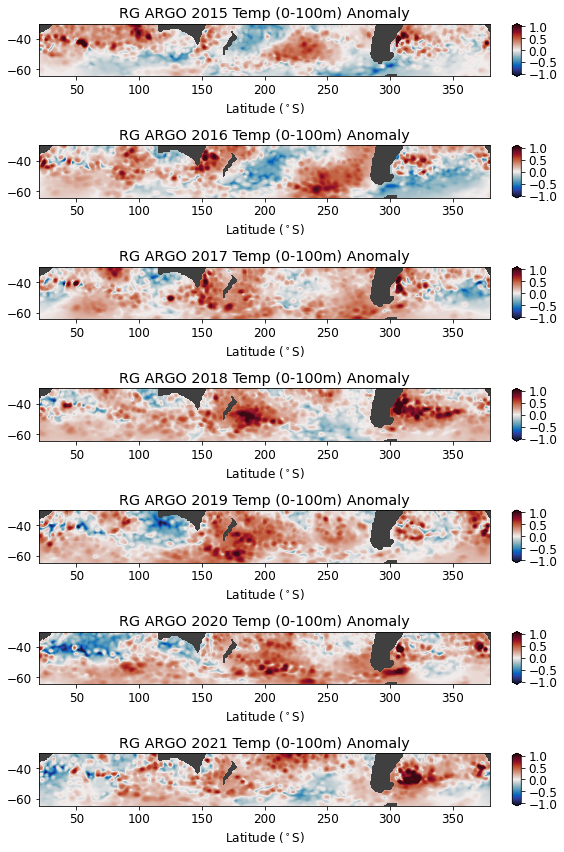

In [110]:
#do a spatial plot
fontsize=12
plt.rcParams['font.size'] = fontsize

plt.figure(figsize=(8,12))

#BUG HERE ... need to thickness weight dzt
var1= rgargo_0418.ARGO_TEMPERATURE_ANOMALY[132:144,0:11,:,:].mean(dim='PRESSURE').mean(dim='TIME').compute()
print(var1.shape)

clev = np.arange(-1,1.01,.01)
tick_lvls = np.arange(-1,1.5, .5)

plt.subplot(7,1,1)
plt.gca().patch.set_color('.25')
p1=plt.contourf(var1.LONGITUDE,var1.LATITUDE,var1,cmap=cm.cm.balance,levels=clev,extend='both') #
#plt.ylabel('Pressure (dbar)')
plt.xlabel('Latitude ($^\circ$S)')
#plt.ylim((5500,1000))
plt.ylim([-64.5,-30])
#plt.xticks([-65,-55])
plt.title('RG ARGO 2015 Temp (0-100m) Anomaly')

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
cb.ax.set_xlabel('$^\circ$C')


#BUG HERE ... need to thickness weight dztvar1= rgargo_0418.ARGO_TEMPERATURE_ANOMALY[144:156,0:11,:,:].mean(dim='PRESSURE').mean(dim='TIME').compute()
print(var1.shape)

plt.subplot(7,1,2)
plt.gca().patch.set_color('.25')
p1=plt.contourf(var1.LONGITUDE,var1.LATITUDE,var1,cmap=cm.cm.balance,levels=clev,extend='both') #
#plt.ylabel('Pressure (dbar)')
plt.xlabel('Latitude ($^\circ$S)')
#plt.ylim((5500,1000))
plt.ylim([-64.5,-30])
#plt.xticks([-65,-55])
plt.title('RG ARGO 2016 Temp (0-100m) Anomaly')

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
cb.ax.set_xlabel('$^\circ$C')

#BUG HERE ... need to thickness weight dztvar1= rgargo_0418.ARGO_TEMPERATURE_ANOMALY[156:168,0:11,:,:].mean(dim='PRESSURE').mean(dim='TIME').compute()
print(var1.shape)

plt.subplot(7,1,3)
plt.gca().patch.set_color('.25')
p1=plt.contourf(var1.LONGITUDE,var1.LATITUDE,var1,cmap=cm.cm.balance,levels=clev,extend='both') #
#plt.ylabel('Pressure (dbar)')
plt.xlabel('Latitude ($^\circ$S)')
#plt.ylim((5500,1000))
plt.ylim([-64.5,-30])
#plt.xticks([-65,-55])
plt.title('RG ARGO 2017 Temp (0-100m) Anomaly')

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
cb.ax.set_xlabel('$^\circ$C')

#BUG HERE ... need to thickness weight dzt
var1= rgargo_0418.ARGO_TEMPERATURE_ANOMALY[168:180,0:11,:,:].mean(dim='PRESSURE').mean(dim='TIME').compute()
print(var1.shape)

plt.subplot(7,1,4)
plt.gca().patch.set_color('.25')
p1=plt.contourf(var1.LONGITUDE,var1.LATITUDE,var1,cmap=cm.cm.balance,levels=clev,extend='both') #
#plt.ylabel('Pressure (dbar)')
plt.xlabel('Latitude ($^\circ$S)')
#plt.ylim((5500,1000))
plt.ylim([-64.5,-30])
#plt.xticks([-65,-55])
plt.title('RG ARGO 2018 Temp (0-100m) Anomaly')

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
cb.ax.set_xlabel('$^\circ$C')

#BUG HERE ... need to thickness weight dzt
var1= rgargo_1921.ARGO_TEMPERATURE_ANOMALY[0:12,0:11,:,:].mean(dim='PRESSURE').mean(dim='TIME').compute()
print(var1.shape)

plt.subplot(7,1,5)
plt.gca().patch.set_color('.25')
p1=plt.contourf(var1.LONGITUDE,var1.LATITUDE,var1,cmap=cm.cm.balance,levels=clev,extend='both') #
#plt.ylabel('Pressure (dbar)')
plt.xlabel('Latitude ($^\circ$S)')
#plt.ylim((5500,1000))
plt.ylim([-64.5,-30])
#plt.xticks([-65,-55])
plt.title('RG ARGO 2019 Temp (0-100m) Anomaly')

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
cb.ax.set_xlabel('$^\circ$C')

#BUG HERE ... need to thickness weight dzt
var1= rgargo_1921.ARGO_TEMPERATURE_ANOMALY[12:24,0:11,:,:].mean(dim='PRESSURE').mean(dim='TIME').compute()
print(var1.shape)

plt.subplot(7,1,6)
plt.gca().patch.set_color('.25')
p1=plt.contourf(var1.LONGITUDE,var1.LATITUDE,var1,cmap=cm.cm.balance,levels=clev,extend='both') #
#plt.ylabel('Pressure (dbar)')
plt.xlabel('Latitude ($^\circ$S)')
#plt.ylim((5500,1000))
plt.ylim([-64.5,-30])
#plt.xticks([-65,-55])
plt.title('RG ARGO 2020 Temp (0-100m) Anomaly')

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
cb.ax.set_xlabel('$^\circ$C')

#BUG HERE ... need to thickness weight dzt
var1= rgargo_1921.ARGO_TEMPERATURE_ANOMALY[24:36,0:11,:,:].mean(dim='PRESSURE').mean(dim='TIME').compute()
print(var1.shape)

plt.subplot(7,1,7)
plt.gca().patch.set_color('.25')
p1=plt.contourf(var1.LONGITUDE,var1.LATITUDE,var1,cmap=cm.cm.balance,levels=clev,extend='both') #
#plt.ylabel('Pressure (dbar)')
plt.xlabel('Latitude ($^\circ$S)')
#plt.ylim((5500,1000))
plt.ylim([-64.5,-30])
#plt.xticks([-65,-55])
plt.title('RG ARGO 2021 Temp (0-100m) Anomaly')

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
cb.ax.set_xlabel('$^\circ$C')

plt.tight_layout()

plt.savefig('RGARGO_Up100m_Temp_Ann.png',dpi=220,bbox_inches = 'tight')


In [116]:
rgargo_temp_0421.shape

(216, 58, 145, 360)

In [130]:
#make a movie of zonal average temp anoms relative to LTMM
fig = plt.figure(figsize=(10, 8), dpi=220)
plt.subplot(1, 1, 1)
plt.gca().patch.set_color('.25')

clev = np.arange(-.5,.51,.01)
tick_lvls = np.arange(-.5,.6,.1)

yr=2013
mnth= 0 #['Jan,Feb,Mar]
mnth_txt=['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sept','Oct','Nov','Dec']


for ii in range(0,96): #96
    
    if np.mod(ii,12)==0:
        yr=yr+1
        mnth=0
    print(mnth,ii) #var2a.TIME)
    

    #BUG HERE ... need to thickness weight dzt
    var1= rgargo_temp_0421[120+ii,0:11,:,:].mean(dim='PRESSURE').compute()
    #calc LTMM
    
    #BUG HERE ... need to thickness weight dzt
    var2=rgargo_temp_0421[mnth:216:12,0:11,:,:].mean(dim='TIME').mean(dim='PRESSURE').compute()
    
    var3=var1-var2
    print(var1.shape,var2.shape,var3.shape)
    
    plt.gca().patch.set_color('.25')
    p1=plt.contourf(var1.LONGITUDE,var1.LATITUDE,var3,cmap=cm.cm.balance,levels=clev,extend='both') #
    plt.xlabel('Latitude ($^\circ$S)')
    plt.ylim([-64.5,-30])
    
    tit='RG ARGO Temp (0-100m) Anomaly (-LTMM) '+ str(yr) +' '+mnth_txt[mnth]
    print(tit)
    plt.title(tit)
    
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", "2%", pad="5%")
    cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
    cb.ax.set_xlabel('$^\circ$C')

    plt.tight_layout()
    
    mnth=mnth+1
    
    filestr = '/home/561/pas561/gdv45/jnb/SeaIce2021/movies/up100m_ltmm_temp_image%04d.png' % ii
    plt.savefig(filestr,dpi=150,bbox_inches='tight')
    plt.clf()

0 0
(145, 360) (145, 360) (145, 360)
RG ARGO Temp (0-100m) Anomaly (-LTMM) 2014 Jan
1 1
(145, 360) (145, 360) (145, 360)
RG ARGO Temp (0-100m) Anomaly (-LTMM) 2014 Feb
2 2
(145, 360) (145, 360) (145, 360)
RG ARGO Temp (0-100m) Anomaly (-LTMM) 2014 Mar
3 3
(145, 360) (145, 360) (145, 360)
RG ARGO Temp (0-100m) Anomaly (-LTMM) 2014 Apr
4 4
(145, 360) (145, 360) (145, 360)
RG ARGO Temp (0-100m) Anomaly (-LTMM) 2014 May
5 5
(145, 360) (145, 360) (145, 360)
RG ARGO Temp (0-100m) Anomaly (-LTMM) 2014 Jun
6 6
(145, 360) (145, 360) (145, 360)
RG ARGO Temp (0-100m) Anomaly (-LTMM) 2014 July
7 7
(145, 360) (145, 360) (145, 360)
RG ARGO Temp (0-100m) Anomaly (-LTMM) 2014 Aug
8 8
(145, 360) (145, 360) (145, 360)
RG ARGO Temp (0-100m) Anomaly (-LTMM) 2014 Sept
9 9
(145, 360) (145, 360) (145, 360)
RG ARGO Temp (0-100m) Anomaly (-LTMM) 2014 Oct
10 10
(145, 360) (145, 360) (145, 360)
RG ARGO Temp (0-100m) Anomaly (-LTMM) 2014 Nov
11 11
(145, 360) (145, 360) (145, 360)
RG ARGO Temp (0-100m) Anomaly (-L

<Figure size 2200x1760 with 0 Axes>

In [133]:
from PIL import Image
import glob
!ffmpeg -framerate 5 -pattern_type glob -i '/home/561/pas561/gdv45/jnb/SeaIce2021/movies/up100m_ltmm_temp_image*.png' -s 1800x1800 -c:v libx264 -pix_fmt yuv420p /home/561/pas561/gdv45/jnb/SeaIce2021/movies/up100m_ltmm_temp_1421.mp4

ffmpeg version 4.4.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 9.4.0 (GCC)
  configuration: --prefix=/home/conda/feedstock_root/build_artifacts/ffmpeg_1636205340875/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1636205340875/_build_env/bin/x86_64-conda-linux-gnu-cc --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-gnutls --enable-gpl --enable-hardcoded-tables --enable-libfreetype --enable-libopenh264 --enable-vaapi --enable-libx264 --enable-libx265 --enable-libaom --enable-libsvtav1 --enable-libxml2 --enable-libvpx --enable-pic --enable-pthreads --enable-shared --disable-static --enable-version3 --enable-zlib --enable-libmp3lame --pkg-config=/home/conda/feedstock_root/build_artifacts/ffmpeg_1636205340875/_build_env/bin/pkg-config
  lib